# Classification 범주형 변수 예측

## binary

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [4]:
file1="c:/temp/credit_LN4.csv"
credit=pd.read_csv(file1)
credit

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


### Logistic model : sm package

In [5]:
x=credit['balance']
X=sm.add_constant(x)
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']

logit_model=sm.Logit(y,X).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                     inf
Time:                        14:59:04   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### logistic에서 coefficient 값 : 양 음이 중요

양수면 Pr(y=1)일 확률 증가

In [7]:
# 만든 모델로 y=1이 될 확률구해보자
X1=[1,1000]
logit_model.predict(X1)
# 상수항이 1이고, balance 가 1000 인 경우

array([0.00575215])

In [8]:
# Pr(Y=1|balance=2000)
X1=[1,2000]
logit_model.predict(X1)

array([0.58576937])

### regression 돌리려는데 x 변수가 더미 변수인 경우

새로 더미 변수를 정의해서 새로 정의한 변수를 넣고 reg 돌린다.

In [9]:
stu=pd.get_dummies(credit['student'])
credit['stu_yes']=stu['Yes']
credit

,Unnamed: 0,default,student,balance,income,stu_yes
0,1,No,No,729.526495,44361.625074,0
1,2,No,Yes,817.180407,12106.134700,1
2,3,No,No,1073.549164,31767.138947,0
3,4,No,No,529.250605,35704.493935,0
4,5,No,No,785.655883,38463.495879,0
...,...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914,0
9996,9997,No,No,757.962918,19660.721768,0
9997,9998,No,No,845.411989,58636.156984,0
9998,9999,No,No,1569.009053,36669.112365,0


In [10]:
x=credit[['stu_yes','income','balance']]
X=sm.add_constant(x) # sm 패키지 쓸 때는 상수항 추가
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']

logit_model1=sm.Logit(y,X).fit()
logit_model1.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                     inf
Time:                        15:05:18   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
stu_yes       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
balance        0.0057      0.000     24.737      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

###  결과 해석

-0.6468: 부호가 마이너스 : 학생이면 default할 확률이 낮아진다. 

3.033e-06: 양수 : income 증가할 수록 default할 확률이 커진다.

0.0057 : 양수 : balance 많을 수록 default할 확률 크다.

(e: 10의 마이너스 6승)

계량에서는 p value 계산함. (유의성) 

income은 통계적으로 유의하지 않다. 왜냐면 p value가 너무 크기 때문에.




-해석의 정확한 의미


계량에서는 해석할때는 '다른 조건은 일정할 때' 학생이면~~ 이렇게 해석해야함.

현실에서는 학생이더 balance가 많을 거기떄문에 학생이 더 risky 하다고 나올것

balance가 같다면! 학생이 덜 위험

boxplot 보면 알 수 있다.


#### confounding effect: 

학생만 변수로 사용하면 학생이 더 위험함.

학생과 발란스를 동시에 넣어서 추정? 학생이 덜 위험하게 나옴.

두 변수가 혼합되어있다!

분리해봤더니 오히려 학생은 덜 위험한 사람이더라.

그래서 혼합되어있을때는 balance가 많아서 위험한건지, 학생이라 위험한건지...

In [11]:
# prediction

X1=[1,1,40000,1500]
logit_model1.predict(X1)

array([0.05788194])

In [12]:
X1=[1,0,40000,1500]
logit_model1.predict(X1)

array([0.10499192])

# Multinomial Logistic Regression

binary 아닌 classification

이때는 sm 아닌 sk 패키지 사용 : LogisticRegression

# ROC curve, confusion matrix

Roc curve: 가능한 모든 threshold에서 측정한 classificaiton rate을 그래프로 보여주는 방식

roc curve의 모양이 중요함!

모형 별로 roc curve 나오는데, 그 모양 비교해서 뭐가더 예측 잘하는 모형인지 비교함. 

Q) 어떻게 모양이 되어야 예측을 잘하는 모형일까

곡선의 아랜쪽면적(AUC)이 클수록 예측을 잘한다!

AUC의 최댓값=1

일반적으로 AUC=0.85이면 아주 좋다고 판단한다.

In [13]:
# sm 과 달리 sk에는 따로 상수 추가할 필요가 없음.
# 변수 하나라도 [[]] 이렇게

x=credit[['balance']]
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Yes, Length: 10000, dtype: uint8

In [15]:
clf=LogisticRegression().fit(x,y)
clf

LogisticRegression()

In [16]:
clf.coef_

array([[0.00549892]])

In [17]:
clf.intercept_

array([-10.65132824])

In [18]:
# x변수가 2개 이상인 경우에는 다음과 같이 실행해야 sm.Logit 과 같은 결과가 나온다. 
# clf=LogisticRegression(penalty='none', solver='newton-cg').fit(x,y)

In [21]:
# ROC, AUC
pred1=clf.predict_proba(x)
pred1
# 첫번째값 넣었을 때[y=0일확률, y가 1일 확률]

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [23]:
pred2=clf.predict(x)
pred2
pd.value_counts(pred2)
# 1이 나오는, default 하는 경우가 142

0    9858
1     142
dtype: int64

In [24]:
# confusion matrix

confusion_matrix(y,pred2)

array([[9625,   42],
       [ 233,  100]], dtype=int64)

In [25]:
# ccr
(9625+100)/10000

0.9725

In [28]:
# sensitivity 진양성 true positive rate tpr
# specificity true negative rate tnr
# 1-spec 위양성 Pr(y_hat=1|y=0) false positive rate

# sepcificity
9625/(9625+42)

0.9956553222302679

In [29]:
# sensitivity
100/(100+233)

0.3003003003003003

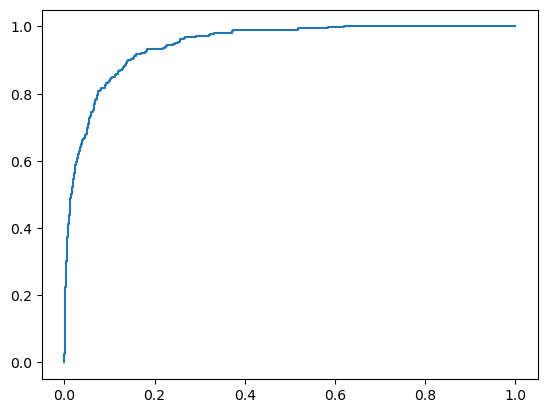

In [30]:
# roc 그리기

fpr, tpr, thresholds=roc_curve(y,pred1[:,1])
plt.plot(fpr, tpr)
plt.show()

In [31]:
#auc
roc_auc_score(y,pred1[:,1])

0.9479784946837808

# sklearn 변수 여러개 모델

In [50]:
x=credit[['stu_yes','income','balance']]
y=credit['default']
y=pd.get_dummies(y)
y=y['Yes']

clf2=LogisticRegression(penalty='none', solver='newton-cg').fit(x,y)
clf2

LogisticRegression(penalty='none', solver='newton-cg')

In [51]:
clf2.coef_

array([[-6.54138022e-01,  2.70107145e-06,  5.72790417e-03]])

In [52]:
clf2.intercept_

array([-10.84133093])

In [53]:
# roc

pred1=clf2.predict_proba(x)
pred1

array([[9.98561693e-01, 1.43830708e-03],
       [9.98867323e-01, 1.13267671e-03],
       [9.90110460e-01, 9.88953999e-03],
       ...,
       [9.97101073e-01, 2.89892658e-03],
       [8.52601383e-01, 1.47398617e-01],
       [9.99966336e-01, 3.36636624e-05]])

In [54]:
pred2=clf2.predict(x)
pred2
pd.value_counts(pred2)

0    9855
1     145
dtype: int64

In [55]:
roc_curve(y,pred1[:,1])

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.03444709e-04,
        1.03444709e-04, 3.10334126e-04, 3.10334126e-04, 4.13778835e-04,
        4.13778835e-04, 6.20668253e-04, 6.20668253e-04, 7.24112962e-04,
        7.24112962e-04, 8.27557670e-04, 8.27557670e-04, 9.31002379e-04,
        9.31002379e-04, 1.13789180e-03, 1.13789180e-03, 1.24133651e-03,
        1.24133651e-03, 1.44822592e-03, 1.44822592e-03, 1.55167063e-03,
        1.55167063e-03, 1.65511534e-03, 1.65511534e-03, 1.75856005e-03,
        1.75856005e-03, 1.86200476e-03, 1.86200476e-03, 1.96544947e-03,
        1.96544947e-03, 2.06889418e-03, 2.06889418e-03, 2.17233888e-03,
        2.17233888e-03, 2.27578359e-03, 2.27578359e-03, 2.37922830e-03,
        2.37922830e-03, 2.48267301e-03, 2.48267301e-03, 2.58611772e-03,
        2.58611772e-03, 2.68956243e-03, 2.68956243e-03, 2.79300714e-03,
        2.79300714e-03, 2.89645185e-03, 2.89645185e-03, 3.10334126e-03,
        3.10334126e-03, 3.20678597e-03, 3.20678597e-03, 3.413675

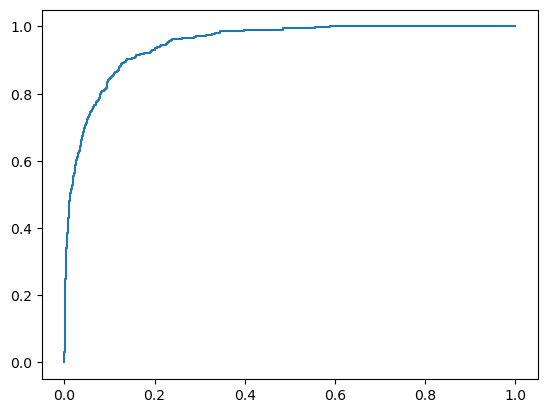

In [56]:
fpr, tpr, thresolds=roc_curve(y,pred1[:,1])
plt.plot(fpr, tpr)
plt.show()

In [57]:
roc_auc_score(y,pred1[:,1])

0.949549425291641

In [58]:
confusion_matrix(y,pred2)

array([[9627,   40],
       [ 228,  105]], dtype=int64)

In [60]:
#전체 개수에서 대각선의 개수의 합을 분자로 하면 CCR
# ccr : correctly classified rate
(9627+105)/10000

0.9732

In [62]:
spec=(9627)/(9627+40)
spec

0.9958622116478743

In [63]:
sen=(105)/(228+105)
sen

0.3153153153153153

# out of sample prediction - sklearn

## 시계열데이터

In [65]:
file2="c:/temp/smarket.csv"
smarket=pd.read_csv(file2, index_col='Year', parse_dates=True)

# 시계열 데이터를 불러올 때는 time variable이 index column 되도록 지정해야 한다. 
smarket.index=smarket.index.year
smarket

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...
2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up


In [66]:
train_set=smarket[smarket.index<=2004]
test_set=smarket[smarket.index>=2005]

In [67]:
train_set=smarket.loc[:2004]
test_set=smarket.loc[2005:]